In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import Ridge
import os
import pandas as pd

from disp import get_line, set_color, set_plot
from run_train import TrainArgs, train

cc = np.concatenate

In [2]:
df_train = pd.read_csv('data_s5/real/rgr/train.tsv', sep='\t', header=None)
ys_train = np.array(df_train[0])
xs_train = np.array([
    [float(x) for x in seq.split(',')]
    for seq in df_train[1]
])

df_val = pd.read_csv('data_s5/real/rgr/val.tsv', sep='\t', header=None)
ys_val = np.array(df_val[0])
xs_val = np.array([
    [float(x) for x in seq.split(',')]
    for seq in df_val[1]
])

In [3]:
rgr = Ridge(alpha=1)
rgr.fit(xs_train, ys_train)
y_hats_train = rgr.predict(xs_train)
y_hats_val = rgr.predict(xs_val)

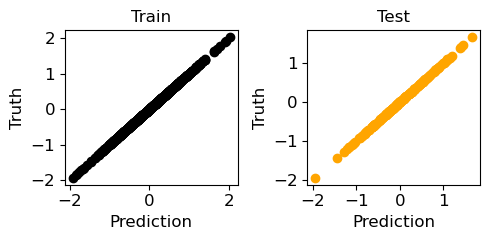

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.5), tight_layout=True)
axs[0].scatter(y_hats_train, ys_train, c='k')
set_plot(axs[0], x_label='Prediction', y_label='Truth', title='Train')
axs[1].scatter(y_hats_val, ys_val, c='orange')
set_plot(axs[1], x_label='Prediction', y_label='Truth', title='Test')